In [1]:
#libraries used for importing and exploring the data
import pandas as pd

#libraries used for model training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#libraries used for performance evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

#libraries for data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Default plot size and type
plt.rc("font", size=14)
plt.figure(figsize=(7,5))
plt.gray()

<Figure size 504x360 with 0 Axes>

In [2]:
#load previously saved preprocessed data
df = pd.read_csv("processed_data.csv")

### Correlation of features

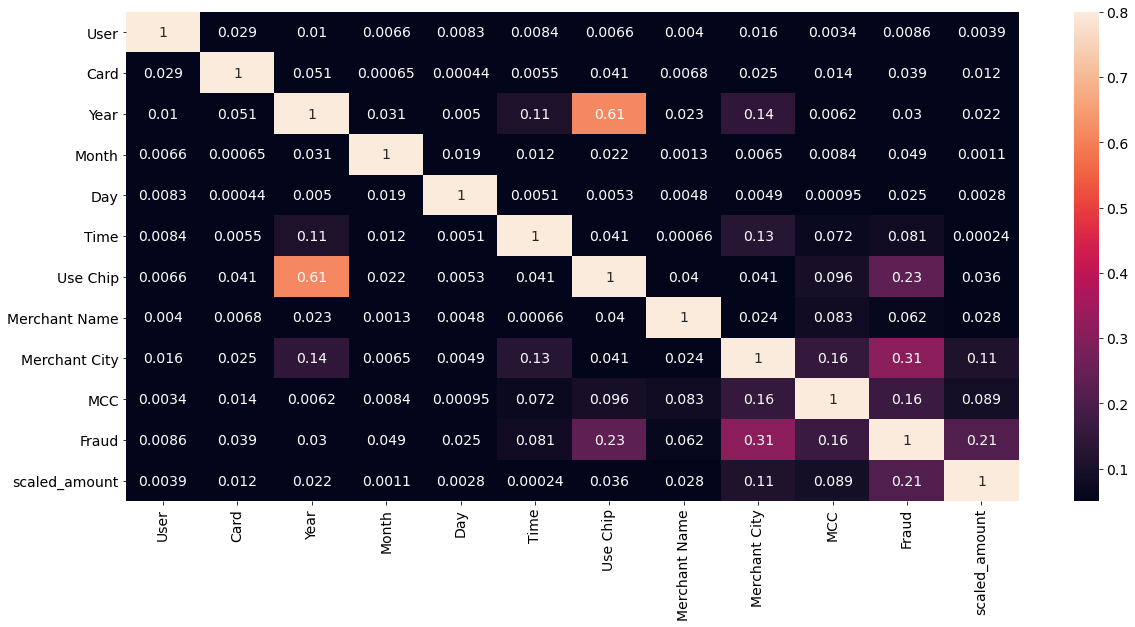

In [3]:
corr_matrix = df.corr()
corr_matrix = abs(corr_matrix)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr_matrix, vmax=0.8, vmin=0.05, annot=True)

### Correlation between other column and Label column

In [4]:
corr_matrix['Fraud'].sort_values(ascending=False)

Fraud            1.000000
Merchant City    0.312880
Use Chip         0.233853
scaled_amount    0.210819
MCC              0.164482
Time             0.080569
Merchant Name    0.062269
Month            0.048687
Card             0.039462
Year             0.030187
Day              0.024611
User             0.008628
Name: Fraud, dtype: float64

In [5]:
top_cols = corr_matrix['Fraud'].sort_values(ascending=False).head(7).to_frame()

In [6]:
top_cols.reset_index(inplace = True)
top_cols.rename(columns={'index': 'Features', 'Fraud': 'Score'},inplace=True)

In [7]:
top_cols

,Features,Score
0,Fraud,1.000000
1,Merchant City,0.312880
2,Use Chip,0.233853
3,scaled_amount,0.210819
4,MCC,0.164482
5,Time,0.080569
6,Merchant Name,0.062269


In [8]:
feat_eng_df = df[top_cols.Features.to_numpy()]

In [9]:
feat_eng_df = feat_eng_df.sample(frac=1).reset_index(drop=True)

In [10]:
feat_eng_df.head()

,Fraud,Merchant City,Use Chip,scaled_amount,MCC,Time,Merchant Name
0,0,5773,2,0.084607,5411,675,75781
1,0,8526,0,0.096861,4829,1358,27092
2,0,6478,0,0.097024,8021,973,24132
3,0,10304,2,0.081904,5411,658,75781
4,1,10300,1,0.086448,5912,992,41375


In [11]:
y = feat_eng_df['Fraud']
X = feat_eng_df.drop(['Fraud'], axis = 1)

In [12]:
class_labels = ['Non Fraud', 'Fraud']

### Split Dataset For Training & Testing

In [13]:
#80:20 Split for Training & Testing Data respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Model 1: Random Forest Classifier

In [14]:
FE_RandForest= RandomForestClassifier(n_estimators=100, max_depth=None, random_state=123, max_leaf_nodes=None)
FE_RandForest= FE_RandForest.fit(X_train, y_train)
FE_RandForest

RandomForestClassifier(random_state=123)

In [15]:
y_pred_FE_RF = FE_RandForest.predict(X_test)
FE_RFacc = FE_RandForest.score(X_test, y_test)

In [16]:
print('Accuracy score= {:.4f}'.format(FE_RFacc))

Accuracy score= 0.9833


#### Confusion Matrix Random Forest

confusion matrix


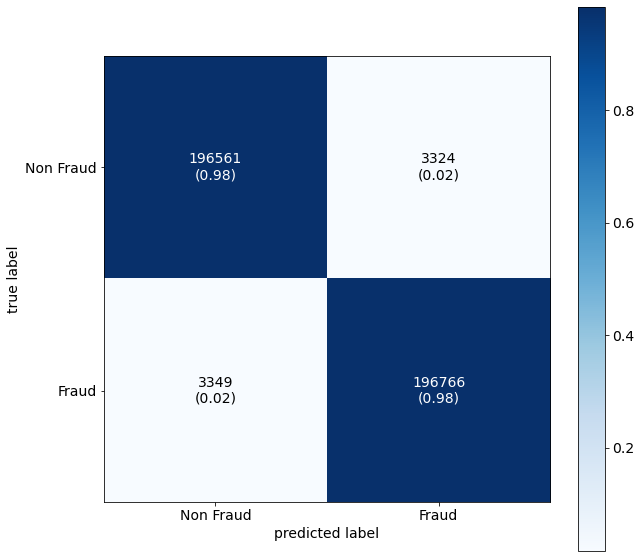

In [17]:
print("confusion matrix")
CMRF = confusion_matrix(y_test, y_pred_FE_RF)
fig, ax = plot_confusion_matrix(conf_mat = CMRF,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

ax.set_xticklabels([''] + class_labels)
ax.set_yticklabels([''] + class_labels)
plt.show()

#### Classification Report for Random Forest

In [18]:
CRRF = classification_report(y_test, y_pred_FE_RF, digits =4, target_names= class_labels )
print(CRRF)

              precision    recall  f1-score   support

   Non Fraud     0.9832    0.9834    0.9833    199885
       Fraud     0.9834    0.9833    0.9833    200115

    accuracy                         0.9833    400000
   macro avg     0.9833    0.9833    0.9833    400000
weighted avg     0.9833    0.9833    0.9833    400000



#### AUC for Random Forest

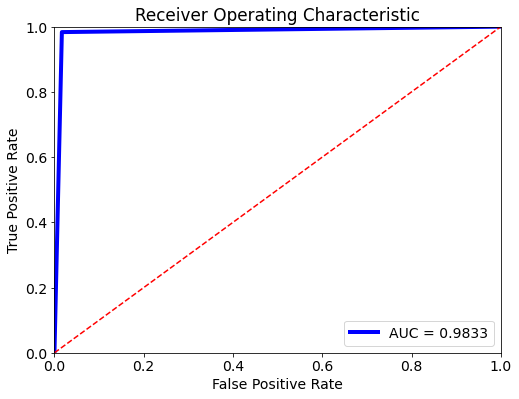

In [19]:
fprFE_RF, tprFE_RF, thresholds = roc_curve(y_test, y_pred_FE_RF)
roc_auc = auc(fprFE_RF, tprFE_RF)
plt.figure(figsize=[8,6])
plt.title('Receiver Operating Characteristic')
plt.plot(fprFE_RF, tprFE_RF, 'b', linewidth= 4, label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model 2: Logistic Regression Classifier

In [20]:
FE_LogReg = LogisticRegression(tol = 1e-6, penalty = 'l2', solver = 'liblinear', random_state = 123)
FE_LogReg = FE_LogReg.fit(X_train, y_train)
FE_LogReg

LogisticRegression(random_state=123, solver='liblinear', tol=1e-06)

In [21]:
y_pred_FE_LR = FE_LogReg.predict(X_test)
FE_LRacc = FE_LogReg.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(FE_LRacc))

Accuracy score= 0.6986


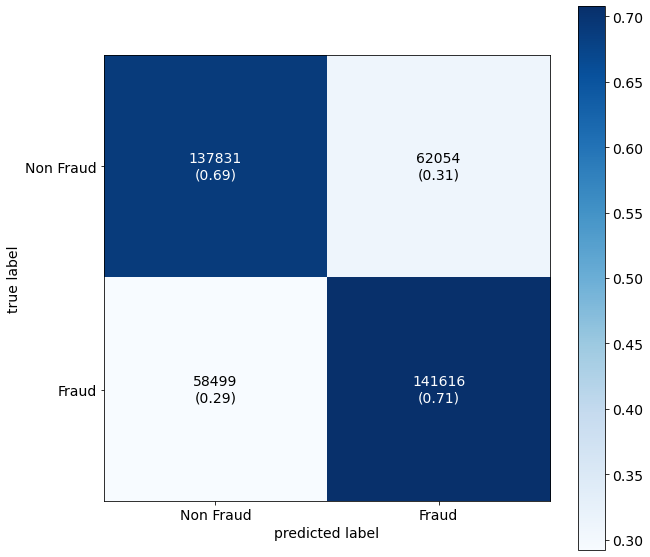

In [22]:
CM = confusion_matrix(y_test, y_pred_FE_LR)
fig, ax = plot_confusion_matrix(conf_mat=CM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
ax.set_xticklabels([''] + class_labels)
ax.set_yticklabels([''] + class_labels)
plt.show()

#### Classification Report for Logistic Regression

In [23]:
crLR=classification_report(y_test, y_pred_FE_LR, digits =4, target_names = class_labels )
print(crLR)

              precision    recall  f1-score   support

   Non Fraud     0.7020    0.6896    0.6957    199885
       Fraud     0.6953    0.7077    0.7014    200115

    accuracy                         0.6986    400000
   macro avg     0.6987    0.6986    0.6986    400000
weighted avg     0.6987    0.6986    0.6986    400000



#### AUC for Random Forest

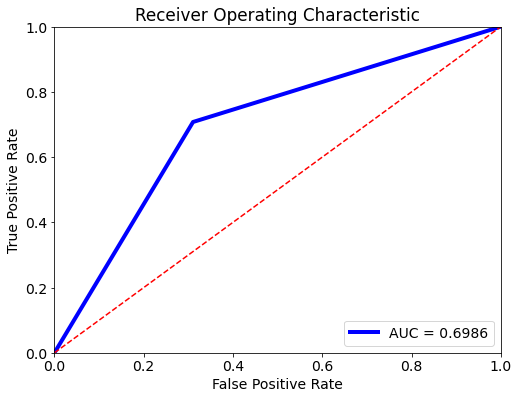

In [24]:
fprFE_LR, tprFE_LR, thresholds = roc_curve(y_test, y_pred_FE_LR)
roc_auc = auc(fprFE_LR, tprFE_LR)
plt.figure(figsize=[8,6])
plt.title('Receiver Operating Characteristic')
plt.plot(fprFE_LR, tprFE_LR, 'b', linewidth= 4, label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()